In [11]:
import numpy as np
import pandas as pd
import scipy.optimize as optimize
import matplotlib.pyplot as plt

In [12]:
def linear(x,m,b):
    return m*x+b

In [47]:
xls = pd.ExcelFile('Basic_linear_data.xlsx')
sheet1 = pd.read_excel(xls, sheet_name=xls.sheet_names[0])
sheet2 = pd.read_excel(xls, sheet_name=xls.sheet_names[1])
sheet3 = pd.read_excel(xls, sheet_name=xls.sheet_names[2])
sheet4 = pd.read_excel(xls, sheet_name=xls.sheet_names[3])

z1=sheet1.loc[:,"z"]
c1=sheet1.loc[:,"c"]
c1err=sheet1.loc[:,"d"]

z2=sheet2.loc[:,"z"]
c2=sheet2.loc[:,"c"]
c2err=sheet2.loc[:,"d"]

z3=sheet3.loc[:,"z"]
c3=sheet3.loc[:,"c"]
c3err=sheet3.loc[:,"d"]

z4=sheet4.loc[:,"z"]
c4=sheet4.loc[:,"c"]
c4err=sheet4.loc[:,"d"]

fit1,fit1cov=optimize.curve_fit(linear, z1, c1, sigma=c1err)
fit1_input=np.linspace(z1[0],list(z1)[-1],100)
fit1_output=fit1_input*fit1[0]+fit1[1]
fit1_sigma=np.diag(fit1cov)
print("fit1",fit1)
print("fit1 sigma",fit1_sigma)
fit1_upperbound_err=fit1_input*(fit1[0]+fit1_sigma[0])+(fit1[1]+fit1_sigma[1])
fit1_lowerbound_err=fit1_input*(fit1[0]-fit1_sigma[0])+(fit1[1]-fit1_sigma[1])


fit2,fit2cov=optimize.curve_fit(linear, z2, c2, sigma=c2err)
fit2_input=np.linspace(z2[0],list(z2)[-1],100)
fit2_output=fit2_input*fit2[0]+fit2[1]
fit2_sigma=np.diag(fit2cov)
print("fit2",fit2)
print("fit2 sigma",fit2_sigma)
fit2_upperbound_err=fit2_input*(fit2[0]+fit2_sigma[0])+(fit2[1]+fit2_sigma[1])
fit2_lowerbound_err=fit2_input*(fit2[0]-fit2_sigma[0])+(fit2[1]-fit2_sigma[1])

fit3,fit3cov=optimize.curve_fit(linear, z3, c3, sigma=c3err)
fit3_input=np.linspace(z3[0],list(z3)[-1],100)
fit3_output=fit3_input*fit3[0]+fit3[1]
fit3_sigma=np.diag(fit3cov)
print("fit3",fit3)
print("fit3 sigma",fit3_sigma)
fit3_upperbound_err=fit3_input*(fit3[0]+fit3_sigma[0])+(fit3[1]+fit3_sigma[1])
fit3_lowerbound_err=fit3_input*(fit3[0]-fit3_sigma[0])+(fit3[1]-fit3_sigma[1])

fit4,fit4cov=optimize.curve_fit(linear, z4, c4, sigma=c4err)
fit4_input=np.linspace(z4[0],list(z4)[-1],100)
fit4_output=fit4_input*fit4[0]+fit4[1]
fit4_sigma=np.diag(fit4cov)
print("fit4",fit4)
print("fit4 sigma",fit4_sigma)
fit4_upperbound_err=fit4_input*(fit4[0]+fit4_sigma[0])+(fit4[1]+fit4_sigma[1])
fit4_lowerbound_err=fit4_input*(fit4[0]-fit4_sigma[0])+(fit4[1]-fit4_sigma[1])





fit1 [ 0.13513373 -1.20868248]
fit1 sigma [0.00159209 0.08780545]
fit2 [ 0.20775662 -1.95228274]
fit2 sigma [0.03180911 1.92702269]
fit3 [ 0.06400935 -0.35387983]
fit3 sigma [0.00127147 0.07152701]
fit4 [ 0.24174681 -1.07721106]
fit4 sigma [0.00205147 0.12884229]


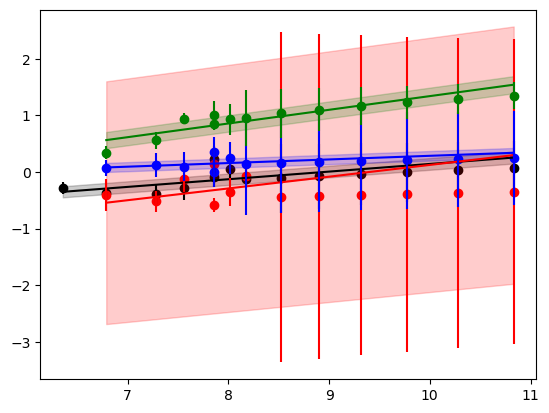

In [49]:
fig1,ax1=plt.subplots()
ax1.scatter(z1,c1,color='black')
ax1.errorbar(z1,c1,yerr=c1err,color='black',linestyle='none')
ax1.plot(fit1_input,fit1_output,color='black')
ax1.fill_between(fit1_input,fit1_upperbound_err,fit1_lowerbound_err,color='black',alpha=0.2)


ax1.scatter(z2,c2,color='red')
ax1.errorbar(z2,c2,yerr=c2err,color='red',linestyle='none')
ax1.plot(fit2_input,fit2_output,color='red')
ax1.fill_between(fit2_input,fit2_upperbound_err,fit2_lowerbound_err,color='red',alpha=0.2)

ax1.scatter(z3,c3,color='blue')
ax1.errorbar(z3,c3,yerr=c3err,color='blue',linestyle='none')
ax1.plot(fit3_input,fit3_output,color='blue')
ax1.fill_between(fit3_input,fit3_upperbound_err,fit3_lowerbound_err,color='blue',alpha=0.2)

ax1.scatter(z4,c4,color='green')
ax1.errorbar(z4,c4,yerr=c4err,color='green',linestyle='none')
ax1.plot(fit4_input,fit4_output,color='green')
ax1.fill_between(fit4_input,fit4_upperbound_err,fit4_lowerbound_err,color='green',alpha=0.2)